# Collect data from McPAS-TCR

First, download the data from http://friedmanlab.weizmann.ac.il/McPAS-TCR/ and place it in the ``TCRdata/raw/database/McPAS-TCR/`` folder. 

Example:
- McPAS-TCR.csv: last updated on: September 10, 2022.
- McPAS-TCR-UTF8.txt: UTF-8 encoding of McPAS-TCR.csv

In [1]:
import os
import pandas as pd
from utils import save_csv, plot_non_empty_percentage

to_your_path = '/data/lujd/'


### ¶ prepare data

In [12]:
''' 
Instructions:
    McPAS-TCR.csv: last updated on: September 10, 2022.
    McPAS-TCR-UTF8.txt: UTF-8 encoding of McPAS-TCR.csv
'''

datapath = to_your_path + "TCRdata/raw/database/McPAS-TCR/"
filename = "McPAS-TCR-UTF8.txt"
df = pd.read_csv(datapath+filename, sep=',', low_memory=False)
# McPAS-TCR.csv: 'utf-8' codec can't decode byte 0xa0 in position 168579: invalid start byte

df.drop_duplicates(inplace=True, ignore_index=True)
print(f"number of rows: {len(df)}")

number of rows: 36738


In [13]:
for col in df.columns:
    print(f"{col}'s number: {df[col].nunique()} ")

CDR3.alpha.aa's number: 9505 
CDR3.beta.aa's number: 31402 
Species's number: 4 
Category's number: 7 
Pathology's number: 83 
Pathology.Mesh.ID's number: 729 
Additional.study.details's number: 84 
Antigen.identification.method's number: 11 
Single.cell's number: 3 
NGS's number: 6 
Antigen.protein's number: 407 
Protein.ID's number: 96 
Epitope.peptide's number: 380 
Epitope.ID's number: 132 
MHC's number: 92 
Tissue's number: 55 
T.Cell.Type's number: 5 
T.cell.characteristics's number: 14 
CDR3.alpha.nt's number: 1022 
TRAV's number: 354 
TRAJ's number: 405 
TRBV's number: 361 
TRBD's number: 26 
TRBJ's number: 207 
Reconstructed.J.annotation's number: 2 
CDR3.beta.nt's number: 4923 
Mouse.strain's number: 34 
PubMed.ID's number: 181 
Remarks's number: 11 


### ¶ Keep main information

In [14]:
brief_df = df[[
    'Epitope.peptide', 'Epitope.ID', 'Antigen.protein', 'Protein.ID',    # ID: UniPort
    'MHC', 
    'TRAV', 'TRAJ', 'CDR3.alpha.aa', 'CDR3.alpha.nt',
    'TRBV', 'TRBD', 'TRBJ', 'CDR3.beta.aa', 'CDR3.beta.nt',
    'Species', 'Category', 'Tissue', 'Pathology', 'Pathology.Mesh.ID',  # Pathology: Lymphocytic choriomeningitis virus (LCMV)...
]]

brief_df = brief_df.rename(
                        columns={
                                'Epitope.peptide':'antigen.epitope',
                                'Antigen.protein':'antigen.protein',
                                'MHC':'mhc.allele',
                                'TRAV':'alpha.v', 
                                'TRAJ':'alpha.j', 
                                'CDR3.alpha.aa':'alpha.cdr3',
                                'CDR3.alpha.nt':'alpha.cdr3.nt',
                                'TRBV':'beta.v', 
                                'TRBD':'beta.d', 
                                'TRBJ':'beta.j', 
                                'CDR3.beta.aa':'beta.cdr3',
                                'CDR3.beta.nt':'beta.cdr3.nt'})

brief_df.head(2)

,antigen.epitope,Epitope.ID,antigen.protein,Protein.ID,mhc.allele,alpha.v,alpha.j,alpha.cdr3,alpha.cdr3.nt,beta.v,beta.d,beta.j,beta.cdr3,beta.cdr3.nt,Species,Category,Tissue,Pathology,Pathology.Mesh.ID
0,IKAVYNFATCG,26751,Pre-glycoprotein polyprotein GP complex,P09991,H-2db,NaN,NaN,NaN,NaN,TRBV8-1,NaN,TRBJ1-1,CASSDAGANTEVF,NaN,Mouse,Pathogens,NaN,Lymphocytic choriomeningitis virus (LCMV),D008217
1,IKAVYNFATCG,26751,Pre-glycoprotein polyprotein GP complex,P09991,H-2db,NaN,NaN,NaN,NaN,TRBV8-1,NaN,TRBJ2-1,CASSDAGAYAEQF,NaN,Mouse,Pathogens,NaN,Lymphocytic choriomeningitis virus (LCMV),D008217


### ¶ Save data to ``TCRdata/collect/``

In [15]:
print(f"number of processed data: {len(brief_df)}")
final_df = brief_df.drop_duplicates(ignore_index=True)
print(f"number of duplicated processed data: {len(final_df)}")

savepath = to_your_path + "TCRdata/collect/"
savename = "McPAS-TCR.csv"
save_csv(final_df, savepath, savename)

number of processed data: 36738
number of duplicated processed data: 36705
File /data/lujd/TCRdata/collect/McPAS-TCR.csv has been successfully saved.


### ¶ Barplot to see how many elements are missing?

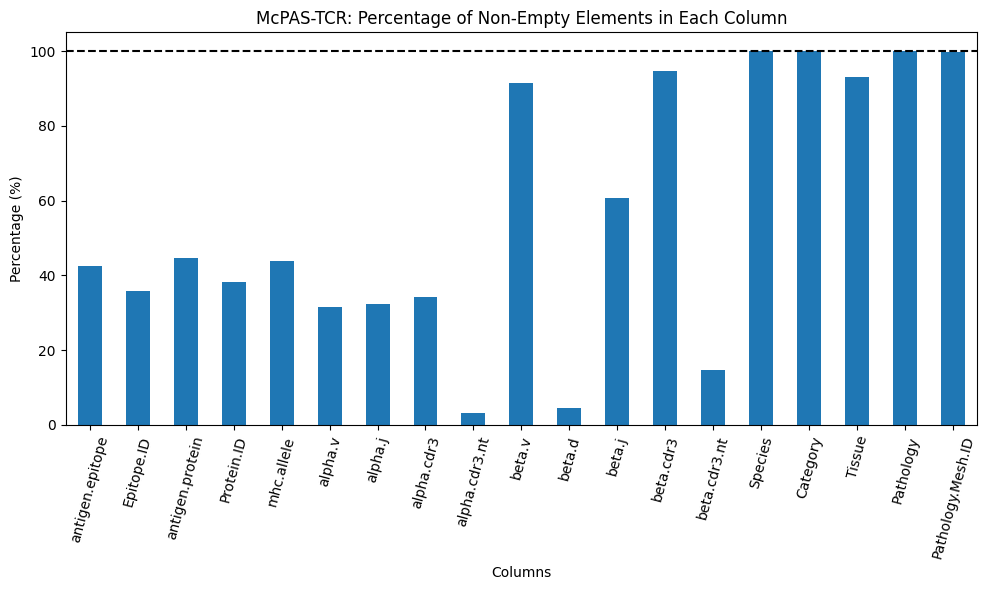

In [16]:
from utils import plot_non_empty_percentage

database = "McPAS-TCR"
plot_non_empty_percentage(final_df, database)

### ¶ Continue processing data

**epitope is the key, percentage should be 100%!!!**

In [17]:
final_df = final_df.dropna(axis=0, how='any', subset = ['antigen.epitope']).reset_index(drop=True)
print(f"number of dropna data: {len(final_df)}")

final_df = final_df.drop_duplicates(ignore_index=True)
print(f"number of duplicated dropna data: {len(final_df)}")

savepath = to_your_path + "TCRdata/collect/"
savename = "McPAS-TCR.csv"
save_csv(final_df, savepath, savename)

number of dropna data: 15566
number of duplicated dropna data: 15566
File /data/lujd/TCRdata/collect/McPAS-TCR.csv has been successfully saved.


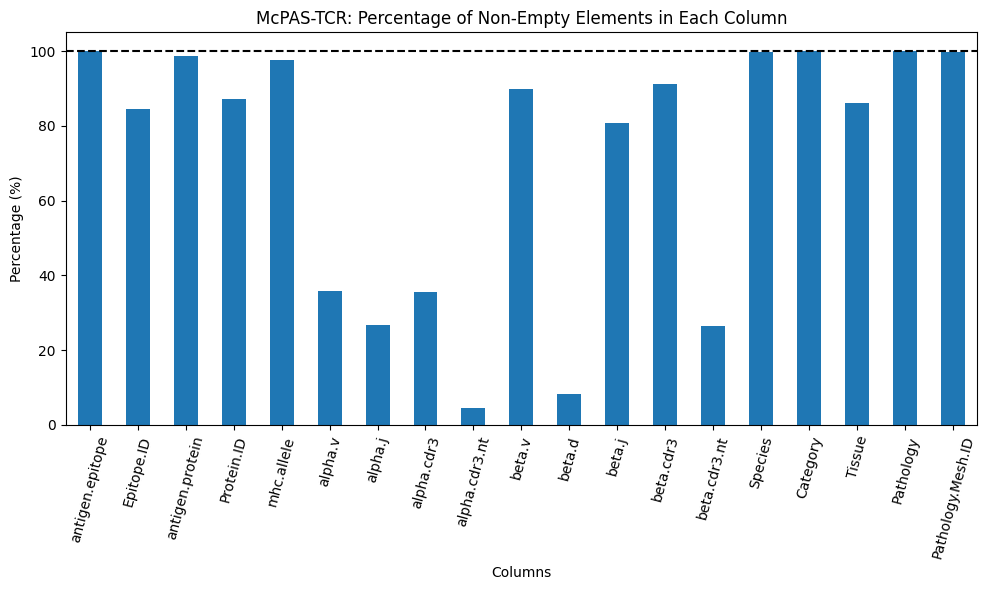

In [18]:
from utils import plot_non_empty_percentage

database = "McPAS-TCR"
plot_non_empty_percentage(final_df, database)

---
## ¶ Data that can be used

In [19]:
print("|\t\t|a\t|b\t|ab\t|a/b\t|")
print("|:-:\t\t|:-:\t|:-:\t|:-:\t|:-:\t|")

mcpas_cdr3a_df = final_df.dropna(axis=0, how='any', subset = ['mhc.allele',"alpha.cdr3"]).reset_index(drop=True)
mcpas_cdr3b_df = final_df.dropna(axis=0, how='any', subset = ['mhc.allele',"beta.cdr3"]).reset_index(drop=True)
mcpas_cdr3ab_df = final_df.dropna(axis=0, how='any', subset = ['mhc.allele',"alpha.cdr3", "beta.cdr3"]).reset_index(drop=True)
mcpas_cdr3aorb_df = pd.concat([mcpas_cdr3a_df, mcpas_cdr3b_df], axis=0).drop_duplicates(ignore_index=True)
print(f"|CDR3\t\t|{len(mcpas_cdr3a_df)}\t|{len(mcpas_cdr3b_df)}\t|{len(mcpas_cdr3ab_df)}\t|{len(mcpas_cdr3aorb_df)}\t|")

|		|a	|b	|ab	|a/b	|
|:-:		|:-:	|:-:	|:-:	|:-:	|
|CDR3		|5371	|13886	|4334	|14923	|


In [20]:
for species in mcpas_cdr3aorb_df["Species"].unique():
    mcpas_cdr3aorb_df_species = mcpas_cdr3aorb_df[mcpas_cdr3aorb_df["Species"]==species]
    print(f"{species}\t {len(mcpas_cdr3aorb_df_species)}")

Mouse	 2639
Human	 12240
nan	 0


In [21]:
len(mcpas_cdr3aorb_df)-mcpas_cdr3aorb_df["Species"].count(), len(final_df)-final_df["Species"].count()

(44, 44)

In [22]:
final_df['mhc.allele'].unique()

array(['H-2db', 'H-2Kd', 'H-2Db', 'H-2b', 'HLA-A*02', 'H-2q', 'HLA-A2',
       'HLA-Cw* 16:01', 'HLA-A*011', 'H-2kb', 'H-2g7', 'H-2k', nan,
       'DR3*02:02', 'H-2bxH-2z', 'HLA-A*02:01', 'HLA-A*2:01', 'HLA-B*8',
       'DRB1*04:01', 'HLA-B*44:05', 'H-2s', 'H-2d', 'HLA-B*57:01',
       'HLA-B*57:03', 'H-2u', 'HLA-B*07:02', 'HLA-A*01:01', 'HLA-B*08:01',
       'HLA-B*57', 'HLA-B*08', 'HLA-B*15', 'HLA-B*27', 'HLA-B*27:05',
       'HLA-B*42', 'H-2d/b', 'HLA-B*35:01', 'HLA-A*24:02', 'HLA-A*11:01',
       'HLA-DPB1*02:01', 'HLA-B*35:02', 'HLA-A*01', 'HLA-DRB1*04:01',
       'HLA-B*42:01', 'HLA-DQ2', 'H-2Kb', 'HLA-A1', 'HLA-B7',
       'DRB1*15:03', 'HLA-DQ8', 'DQ8-trans', 'HLA-A*02:02', 'HLA-A*02:03',
       'HLA-A*02:04', 'HLA-A*02:05', 'HLA-A*02:06', 'HLA-A*02:07',
       'HLA-A*02:08', 'HLA-A*02:09', 'HLA-A*02:10', 'HLA-A*02:11',
       'HLA-A*02:12', 'HLA-A*02:13', 'HLA-A*02:14', 'HLA-A*02:15',
       'HLA-A*02:16', 'HLA-A*02:17', 'HLA-DR1', 'HLA-DR11', 'HLA-DR15',
       'HLA-DR5', 'H-

In [23]:
def correct_mhc1(data):
    if str(data)=='nan'or data == None:
        return None
    else:
        return 'HLA-'+data if 'DR' in data and 'HLA' not in data else ''.join(data.split(' '))

final_df['mhc.allele'] = final_df['mhc.allele'].apply(correct_mhc1)

def correct_mhc2(data):
    return 'H-2Db' if data == 'H-2Db?,NA,CD8"' else data

final_df['mhc.allele'] = final_df['mhc.allele'].apply(correct_mhc2)

In [24]:
final_df['mhc.allele'].unique()

array(['H-2db', 'H-2Kd', 'H-2Db', 'H-2b', 'HLA-A*02', 'H-2q', 'HLA-A2',
       'HLA-Cw*16:01', 'HLA-A*011', 'H-2kb', 'H-2g7', 'H-2k', None,
       'HLA-DR3*02:02', 'H-2bxH-2z', 'HLA-A*02:01', 'HLA-A*2:01',
       'HLA-B*8', 'HLA-DRB1*04:01', 'HLA-B*44:05', 'H-2s', 'H-2d',
       'HLA-B*57:01', 'HLA-B*57:03', 'H-2u', 'HLA-B*07:02', 'HLA-A*01:01',
       'HLA-B*08:01', 'HLA-B*57', 'HLA-B*08', 'HLA-B*15', 'HLA-B*27',
       'HLA-B*27:05', 'HLA-B*42', 'H-2d/b', 'HLA-B*35:01', 'HLA-A*24:02',
       'HLA-A*11:01', 'HLA-DPB1*02:01', 'HLA-B*35:02', 'HLA-A*01',
       'HLA-B*42:01', 'HLA-DQ2', 'H-2Kb', 'HLA-A1', 'HLA-B7',
       'HLA-DRB1*15:03', 'HLA-DQ8', 'DQ8-trans', 'HLA-A*02:02',
       'HLA-A*02:03', 'HLA-A*02:04', 'HLA-A*02:05', 'HLA-A*02:06',
       'HLA-A*02:07', 'HLA-A*02:08', 'HLA-A*02:09', 'HLA-A*02:10',
       'HLA-A*02:11', 'HLA-A*02:12', 'HLA-A*02:13', 'HLA-A*02:14',
       'HLA-A*02:15', 'HLA-A*02:16', 'HLA-A*02:17', 'HLA-DR1', 'HLA-DR11',
       'HLA-DR15', 'HLA-DR5', 'HLA-DQ2.